In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

df = pd.read_csv("/content/drive/MyDrive/Copy of XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")
df

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...
...,...,...,...,...,...
4995,Year 2,Mathematics,Ball State University,11,Breaded Pork Tenderloin Sandwich
4996,Year 3,Astronomy,Indiana State University,12,Ultimate Grilled Cheese Sandwich (with bacon a...
4997,Year 3,Chemistry,Butler University,13,Sugar Cream Pie
4998,Year 3,Astronomy,Butler University,15,Sugar Cream Pie


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

def prepare_data(filepath):
    # Load the dataset
    df = pd.read_csv(filepath)

    # Group universities with low count of orders as "Other"
    uni_counts = df['University'].value_counts()
    other_universities = uni_counts[uni_counts < 10].index.tolist()
    df['University'] = df['University'].replace(other_universities, 'Other')

    # Convert categorical data into machine-readable format
    label_encoders = {}
    for column in ['Year', 'Major', 'University']:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    # Splitting the data
    X = df.drop('Order', axis=1)
    y = df['Order']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, label_encoders, scaler


In [5]:
from sklearn.ensemble import RandomForestClassifier
import pickle

def train_and_save_model(X_train, y_train, filename):
    # Train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Save the model using pickle
    with open(filename, 'wb') as file:
        pickle.dump(model, file)


                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.62      0.46      0.53        94
                                  Cornbread Hush Puppies       0.57      0.65      0.61       112
                                    Fried Catfish Basket       0.72      0.55      0.62       107
                        Hoosier BBQ Pulled Pork Sandwich       0.67      0.65      0.66       103
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.61      0.59      0.60        93
    Indiana Corn on the Cob (brushed with garlic butter)       0.68      0.85      0.76        84
                                      Indiana Pork Chili       0.75      0.87      0.81        95
                                         Sugar Cream Pie       0.62      0.58      0.60       110
                                      Sweet Potato Fries       0.61      0.61      0.61        98
Ultimate Grilled Ch

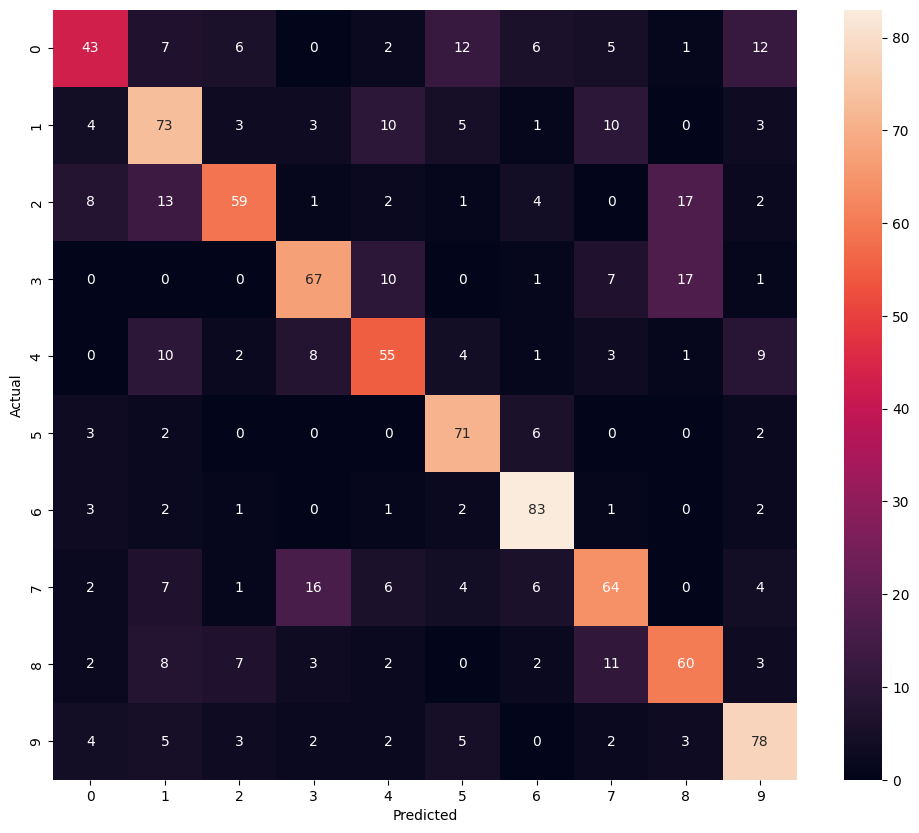

In [8]:
# Preparing the data
X_train, X_test, y_train, y_test, encoders, scaler = prepare_data("/content/drive/MyDrive/Copy of XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")

# Training the model
train_and_save_model(X_train, y_train, 'saved_model.pkl')

# Testing
with open('saved_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

predictions = loaded_model.predict(X_test)

# Evaluation metrics and visuals
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(classification_report(y_test, predictions))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
